# Práctica 3

## Santiago Blasco Arnaiz

# Algoritmo ABC

In [1]:
import numpy as np
from math import inf
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [2]:
U = [[0,0.2,0.2,0.35,0.35],
    [0.2,0,0.15,0.35,0.35],
    [0.2,0.15,0,0.35,0.35],
    [0.35,0.35,0.35,0,0.1],
    [0.35,0.35,0.35,0.1,0]]

In [3]:
#Devuelve el mínimo ([índiceX, índiceY, valor]) de la matriz tringular superior formada
#a partir de la matriz que se le pasa con el formato  
def minimum(M):
    minX, minY = 0, 0
    mini = inf
    for j in range(len(M[0])):
        for i in range(len(M)):
            #Sólo la triangular superior
            if i > j:
                if M[i][j] < mini:
                    minX = i
                    minY = j
                    mini = M[i][j]
    return([minX,minY,mini])

In [4]:
def abc(M):
    #Copiamos la matriz para no modificar la original
    T = M.copy()
    
    head = [0] * len(M)
    U = []
    index = len(M)
    
    #Cabecera de la matriz para conocer los índices de filas y columnas
    #y saber cuantas muestras agrupa, inicialmente cada uno agrupa 1 muestra
    for i in range(len(head)):
        head[i] = [i,1]
    
    for _ in range(len(M)-1):
        #Hallamos el mínimo de la matriz de distancias(sin contar la diagonal)
        m = minimum(T)

        #Cálculamos cual de los índices xy es el mínimo y cual el máximo
        mini = min(m[0],m[1])
        maxi = max(m[0],m[1])
        
        #Calculamos las distancias mínimas de la nueva agrupación
        for i in range(len(T)):
            T[mini][i] = min(T[mini][i],T[maxi][i])
        for i in range(len(T)):
            T[i][mini] = min(T[i][mini],T[i][maxi])
        
        #Eliminamos la fila y columna de x o y, en nuestro caso siempre eliminamos la mayor
        T = np.delete(T,maxi,0)
        T = np.delete(T,maxi,1)
        
        #Recalculamos las muestras que han sido agrupadas
        head[mini][1] = head[mini][1] + head[maxi][1]
        
        #Añadimos a la matriz solución las muestras que han sido agrupadas, la altura a la que se han
        #agrupado y el número de muestras que agrupan en total
        U.append([min(head[mini][0],head[maxi][0]),max(head[mini][0],head[maxi][0]),m[2],head[mini][1]])
        
        #La nueva agrupación obtiene un número en base al último índice adjudicado
        head[mini][0] = index
        index = index + 1
        
        #Eliminamos de la cabecera el índice de la muestra agrupada
        del head[maxi]
    
    #Convertimos a array de floats y lo devolvemos
    U = np.array(U, dtype='float')
    return U

In [5]:
X = abc(U)

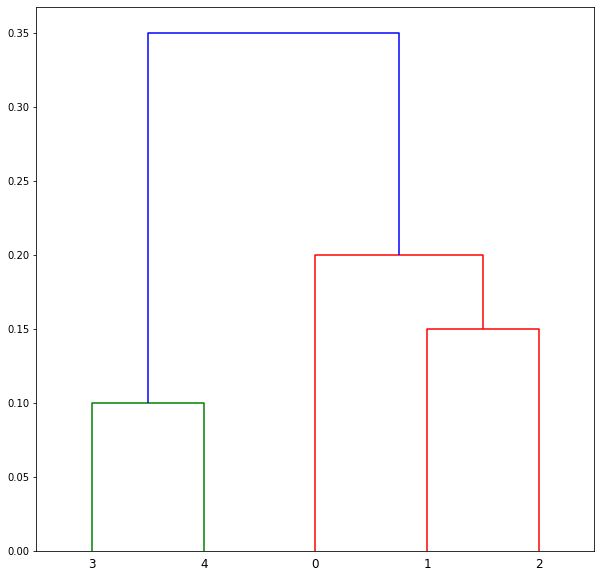

In [6]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)

# Algoritmo AC (Método del mínimo)

In [7]:
U = [[0,1,3,4,7],
    [1,0,4,4,8],
    [3,4,0,2,8],
    [4,4,2,0,7],
    [7,8,8,7,0]]

In [8]:
#Devuelve el mínimo ([índiceX, índiceY, valor]) de la matriz tringular superior formada
#a partir de la matriz que se le pasa con el formato  
def minimum(M):
    minX, minY = 0, 0
    mini = inf
    for i in range(len(M)):
        for j in range(len(M[0])):
            #Sólo la triangular superior
            if j > i:
                if M[i][j] < mini:
                    minX = i
                    minY = j
                    mini = M[i][j]
    return([minX,minY,mini])

In [9]:
def acMin(M):
    #Copiamos la matriz para no modificar la original
    T = M.copy()
    
    head = [0] * len(M)
    U = []
    index = len(M)
    
    #Cabecera de la matriz para conocer los índices de filas y columnas
    #y saber cuantas muestras agrupa, inicialmente cada uno agrupa 1 muestra
    for i in range(len(head)):
        head[i] = [i,1]

    for _ in range(len(M)-1):
        #Hallamos el mínimo de la matriz de distancias(sin contar la diagonal)
        m = minimum(T)
        
        #Cálculamos cual de los índices xy es el mínimo y cual el máximo
        mini = min(m[0],m[1])
        maxi = max(m[0],m[1])
        
        #Calculamos las distancias mínimas de la nueva agrupación
        for i in range(len(T)):
            T[mini][i] = min(T[mini][i],T[maxi][i])
        for i in range(len(T)):
            T[i][mini] = min(T[i][mini],T[i][maxi])

        #Eliminamos la fila y columna de x o y, en nuestro caso siempre eliminamos la mayor
        T = np.delete(T,maxi,0)
        T = np.delete(T,maxi,1)

        
        #Recalculamos las muestras que han sido agrupadas
        head[mini][1] = head[mini][1] + head[maxi][1]
        
        #Añadimos a la matriz solución las muestras que han sido agrupadas, la altura a la que se han
        #agrupado y el número de muestras que agrupan en total
        U.append([min(head[mini][0],head[maxi][0]),max(head[mini][0],head[maxi][0]),m[2],head[mini][1]])
        
        #La nueva agrupación obtiene un número en base al último índice adjudicado
        head[mini][0] = index
        index = index + 1
        
        #Eliminamos de la cabecera el índice de la muestra agrupada
        del head[maxi]
    
    #Convertimos a array de floats y lo devolvemos
    U = np.array(U, dtype='float')
    return U

In [10]:
X = acMin(U)

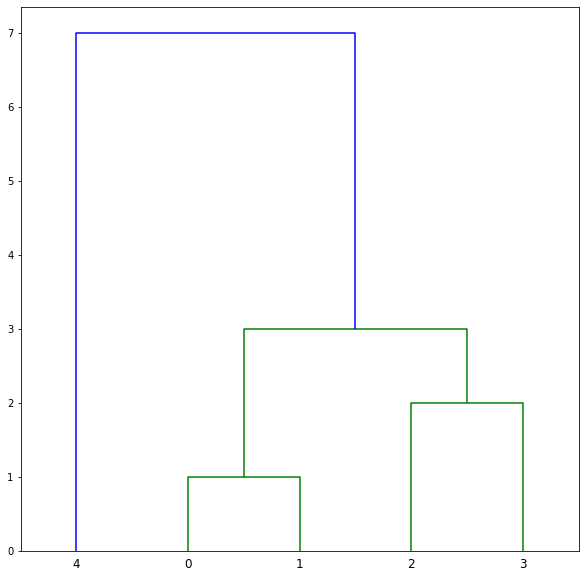

In [11]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)
plt.show()

# Algoritmo AC (Método del máximo)

In [12]:
U = [[0,1,3,4,7],
    [1,0,4,4,8],
    [3,4,0,2,8],
    [4,4,2,0,7],
    [7,8,8,7,0]]

In [13]:
def acMax(M):
    #Copiamos la matriz para no modificar la original
    T = M.copy()
    
    head = [0] * len(M)
    U = []
    index = len(M)
    
    #Cabecera de la matriz para conocer los índices de filas y columnas
    #y saber cuantas muestras agrupa, inicialmente cada uno agrupa 1 muestra
    for i in range(len(head)):
        head[i] = [i,1]

    for _ in range(len(M)-1):
        #Hallamos el mínimo de la matriz de distancias(sin contar la diagonal)
        m = minimum(T)

        #Cálculamos cual de los índices xy es el mínimo y cual el máximo
        mini = min(m[0],m[1])
        maxi = max(m[0],m[1])
        
        #Calculamos las distancias mínimas de la nueva agrupación
        for i in range(len(T)):
            T[mini][i] = max(T[mini][i],T[maxi][i])
        for i in range(len(T)):
            T[i][mini] = max(T[i][mini],T[i][maxi])
        
        #Eliminamos la fila y columna de x o y, en nuestro caso siempre eliminamos la mayor
        T = np.delete(T,maxi,0)
        T = np.delete(T,maxi,1)

        #Recalculamos las muestras que han sido agrupadas
        head[mini][1] = head[mini][1] + head[maxi][1]
        
        #Añadimos a la matriz solución las muestras que han sido agrupadas, la altura a la que se han
        #agrupado y el número de muestras que agrupan en total
        U.append([min(head[mini][0],head[maxi][0]),max(head[mini][0],head[maxi][0]),m[2],head[mini][1]])
        
        #La nueva agrupación obtiene un número en base al último índice adjudicado
        head[mini][0] = index
        index = index + 1
        
        #Eliminamos de la cabecera el índice de la muestra agrupada
        del head[maxi]
    
    #Convertimos a array de floats y lo devolvemos
    U = np.array(U, dtype='float')
    return U

In [14]:
Y = acMax(U)

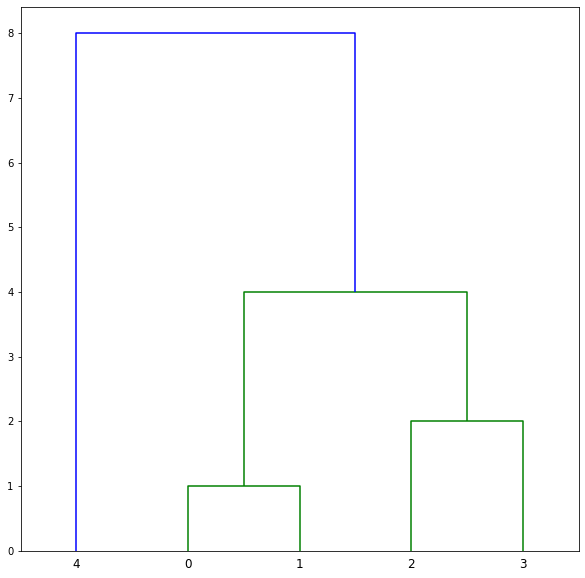

In [15]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Y)
plt.show()

# Algoritmo AC (Método Ward)

In [16]:
U = [[1,2],
     [2,1],
     [2,2.7],
     [5,3],
     [6.5,2],
     [7,3]]

In [17]:
#Calcula la heterogeneidad de un cluster
#index contiene los índices de las muestras que forman el cluster
#M contiene todas las muestras
def heterogeneity(index,M):
    T = M.copy()
    h = 0
    
    for i in index:
        for j in range(len(M[0])):
            
            mean = 0
            for k in index:
                mean = mean + (M[k][j]/len(index))
            
            h = h + np.power((M[i][j] - mean),2)
    return h

In [18]:
#M es la matriz con las muestras
#numC el número de clusters total que se desea obtener
def ward(M,numC):
    T = M.copy()
    
    U = []
    clusters = [[0]] * len(T)
    index = len(T)
    #Cabecera para poder numerar los clusters
    head = [0] * len(T)
    
    #En un inicio hay tantos clusters como muestras
    for i in range(len(clusters)):
        clusters[i] = [i]
        head[i] = i

    while len(clusters) > numC:
        hmin = inf
        #Componentes del nuevo cluster
        nc = []
        #Índices de los clusters que componen el nuevo cluster
        indexNC = [0,0]
        
        #Probamos todas las agrupaciones posibles y nos quedamos con la de menor heterogeneidad
        for i in range(len(clusters)):
            for j in range (len(clusters)):

                if i != j:

                    h = heterogeneity(clusters[i]+clusters[j],T)
                    
                    if h < hmin:
                        hmin = h
                        nc = clusters[i]+clusters[j]
                        indexNC = [i,j]
        
        
        indexNC.sort(reverse=True)
        #Calculamos la altura en función de la raíz cuadrada de la heterogeneidad para escalar
        #Ya que sino no se aprecian bien las alturas
        U.append([head[indexNC[1]],head[indexNC[0]],np.sqrt(hmin),len(nc)])
        #Eliminamos los clusters que componen el nuevo cluster
        for i in indexNC:
            del clusters[i]
            del head[i]
        #Añadimos el nuevo cluster
        clusters.append(nc)
        head.append(index)
        index = index + 1
    
    U = np.array(U, dtype='float')
        
    return U

In [19]:
X = ward(U,1)

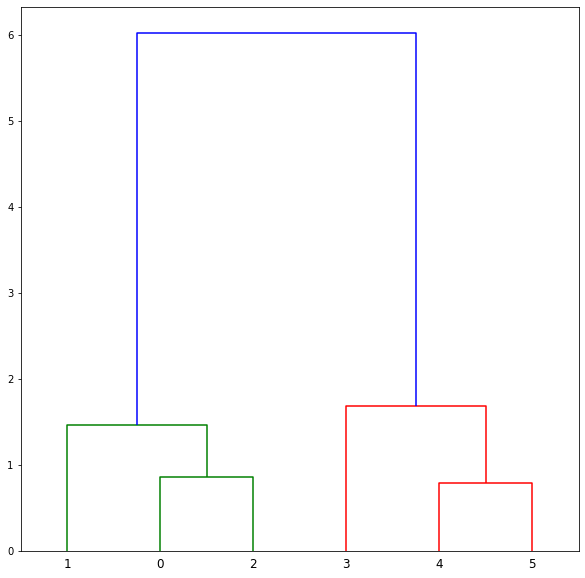

In [20]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)

Si buscamos obtener sólo 3 clsuters esta sería la composición de dichos clusters

In [21]:
X = ward(U,3)
X

array([[4.        , 5.        , 0.79056942, 2.        ],
       [0.        , 2.        , 0.86313383, 2.        ],
       [1.        , 7.        , 1.45830952, 3.        ]])

Primer cluster: 4 y 5
Segundo cluster: 1, 0 y 2
Tercer cluster: 3

### Utilizando el método de scipy

In [22]:
U = [[1,2],
     [2,1],
     [2,2.7],
     [5,3],
     [6.5,2],
     [7,3]]

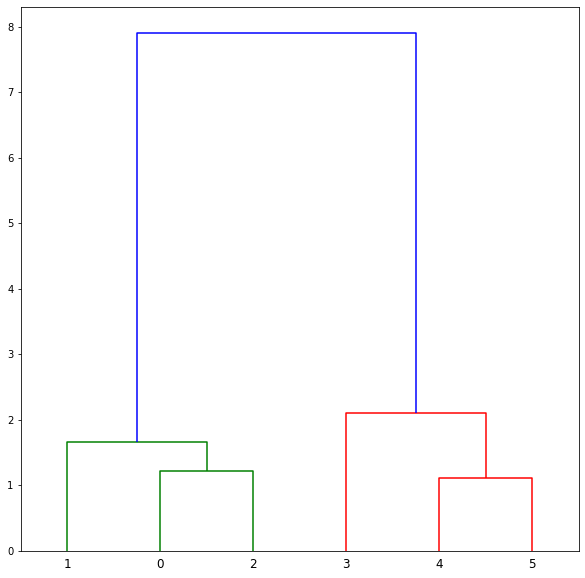

In [23]:
Z = linkage(U, 'ward')
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

# Gráfica de resultados para kmeans y AC (varios métodos) utilizando Iris

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import pandas as pd

In [25]:
#Cargamos el dataset
iris = load_iris()
X,Y = load_iris(return_X_y=True)

#Escalamos los datos
X = scale(X)

max_clusters = 15
min_clusters = 3

### Porcentaje de aciertos con kmeans

In [26]:
#Contiene el porcentaje de aciertos
aciertosKmeans = np.zeros(max_clusters-2, dtype='float')

for k in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=7)
    #Entrenamiento
    kmeans.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        #Sacamos la moda de cada cluster
        moda[i] = mode(Y[np.argwhere(kmeans.labels_ == i)])[0].astype(int)
    #Predicción
    y_predict = moda[kmeans.labels_]
    #Calculamos el porcentaje de acierto
    aciertosKmeans[k-3] = accuracy_score(Y, y_predict)

### Porcentaje de aciertos con AC método min

In [27]:
#Contiene el porcentaje de aciertos
aciertosMin = np.zeros(max_clusters-2, dtype='float')

for k in range(min_clusters, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters= k, linkage="single")
    #Entrenamiento
    clustering.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        #Sacamos la moda de cada cluster
        moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    #Predicción
    y_predict = moda[clustering.labels_]
    #Calculamos el porcentaje de acierto
    aciertosMin[k-3] = accuracy_score(Y, y_predict)

### Porcentaje de aciertos con AC método max

In [28]:
#Contiene el porcentaje de aciertos
aciertosMax = np.zeros(max_clusters-2, dtype='float')

for k in range(min_clusters, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters= k, linkage="complete")
    #Entrenamiento
    clustering.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        #Sacamos la moda de cada cluster
        moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    #Predicción
    y_predict = moda[clustering.labels_]
    #Calculamos el porcentaje de acierto
    aciertosMax[k-3] = accuracy_score(Y, y_predict)

### Porcentaje de aciertos con AC método media

In [29]:
#Contiene el porcentaje de aciertos
aciertosMedia = np.zeros(max_clusters-2, dtype='float')

for k in range(min_clusters, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters= k, linkage="average")
    #Entrenamiento
    clustering.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        #Sacamos la moda de cada cluster
        moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    #Predicción
    y_predict = moda[clustering.labels_]
    #Calculamos el porcentaje de acierto
    aciertosMedia[k-3] = accuracy_score(Y, y_predict)

### Porcentaje de aciertos con AC método Ward

In [30]:
#Contiene el porcentaje de aciertos
aciertosWard = np.zeros(max_clusters-2, dtype='float')

for k in range(min_clusters, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters= k, linkage="ward")
    #Entrenamiento
    clustering.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        #Sacamos la moda de cada cluster
        moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    #Predicción
    y_predict = moda[clustering.labels_]
    #Calculamos el porcentaje de acierto
    aciertosWard[k-3] = accuracy_score(Y, y_predict)

### Gráfico multilínea

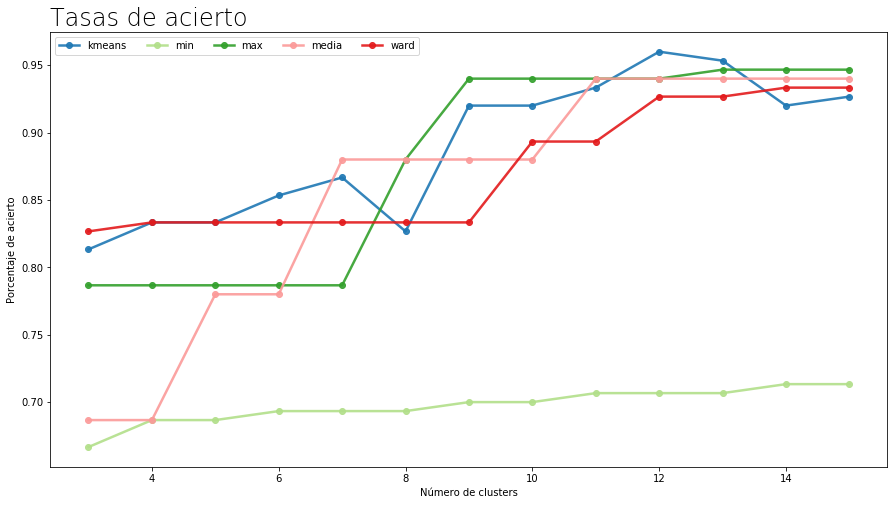

In [48]:
plt.figure(figsize=(15, 8))
#Cargamos los datos
df=pd.DataFrame({'clusters': range(3,16),
                 'kmeans': aciertosKmeans,
                 'min': aciertosMin,
                 'max': aciertosMax,
                 'media': aciertosMedia,
                 'ward': aciertosWard})

#Estilo del gráfico
plt.style.use('seaborn-bright')

#Creamos la paleta de color
palette = plt.get_cmap('Paired')

#Gráfico de varias líneas
num=0
for column in df.drop('clusters', axis=1):
    num=num+1
    plt.plot(df['clusters'], df[column], marker='o', color=palette(num), linewidth=2.5, alpha=0.9, label=column)

#Títulos
plt.title("Tasas de acierto", loc='left', fontsize=24, fontweight=0, color='black')
plt.xlabel("Número de clusters")
plt.ylabel("Porcentaje de acierto")

#Leyenda
plt.legend(loc=2, ncol=5)
